# BUSINESS UNDERSTANDING

## Project Title
Sepsis Prediction for Early Detection and Intervention Using Machine Learning and APIs

## Project Description
This project is focused on building a classification model to predict whether or not a patient in ICU will develop a sepsis using machine learning techniques. The project also includes developing an API for seamless interaction with the model, aiding in early detection and intervention for sepsis.

## Hypothesis
H0: There is NO RELATIONSHIP between patient health indicators and the likelihood of developing sepsis.

H1: There is A RELATIONSHIP between patient health indicators and the likelihood of developing sepsis.
 
(Broad hypothesis is to be refined after Initial exploration)

## Analytical Questions


- What is the distribution of patients across different age groups?
- How many patients have valid insurance cards, and what percentage of patients does this represent?
- What are the average plasma glucose (PRG) and blood pressure (PR) levels among patients?
- Is there a correlation between body mass index (M11) and blood work results (PL, SK, TS, BD2)?

- What is the percentage of patients who develop sepsis (Sepssis) in the dataset?
- Are there any patterns or trends in health indicators or demographics among patients who develop sepsis?

- Is there any trend or pattern in sepsis cases over time based on patient IDs (ID)?
- Are there changes or fluctuations in health indicators or demographics over different age groups?

- Which features (PRG, PL, PR, SK, TS, M11, BD2, Age, Insurance) are most predictive of sepsis development?

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from sklearn.feature_selection import mutual_info_classif

%matplotlib inline

# DATA UNDERSTANDING 

## Understanding data surface properties

In [2]:
train_df = pd.read_csv("../data/raw/Paitients_Files_Train.csv")
test_df = pd.read_csv("../data/raw/Paitients_Files_Test.csv")
train_df

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
test_df

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0    ICU200609    1  109  38  18  120  23.1  0.407   26          1
1    ICU200610    1  108  88  19    0  27.1  0.400   24          1
2    ICU200611    6   96   0   0    0  23.7  0.190   28          1
3    ICU200612    1  124  74  36    0  27.8  0.100   30          1
4    ICU200613    7  150  78  29  126  35.2  0.692   54          0
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...
164  ICU200773   10  101  76  48  180  32.9  0.171   63          1
165  ICU200774    2  122  70  27    0  36.8  0.340   27          1
166  ICU200775    5  121  72  23  112  26.2  0.245   30          1
167  ICU200776    1  126  60   0    0  30.1  0.349   47          1
168  ICU200777    1   93  70  31    0  30.4  0.315   23          1

[169 rows x 10 columns]

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


## Understanding data content and quality

In [6]:
profile = ProfileReport(train_df, dark_mode=True, title="Profile of Sepsis Data")

**Surface Property Summary**

**Dataset Source:** The John Hopkins Universtiy

**Abstract:**  The dataset contains comprehensive information about the health status of patients in the ICU, including details on Patients information and clinical measurements. 

**Features:** 
- PRG -- Plasma glucose
- PL  -- Blood Work Result-1 (mu U/ml)
- PR  -- Blood Pressure (mm Hg)
- SK  -- Blood Work Result-2 (mm)
- TS  -- Blood Work Result-3 (mu U/ml)
- M11 -- Body mass index (weight in kg)/(height in m)^2
- BD2 -- Blood Work Result-4 (mu U/ml)
- Age -- patients age (years)
- Insurance	--	If a patient holds a valid insurance card

**Target:**
- Sepsis --	Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

**Data Type:**  Multivariate

**Format Type:**  Matrix


Dataset seems to be clean, with all variables assigned their right data types. 

In [7]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# save profile report

profile.to_file("../reports/sepsis_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
num_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

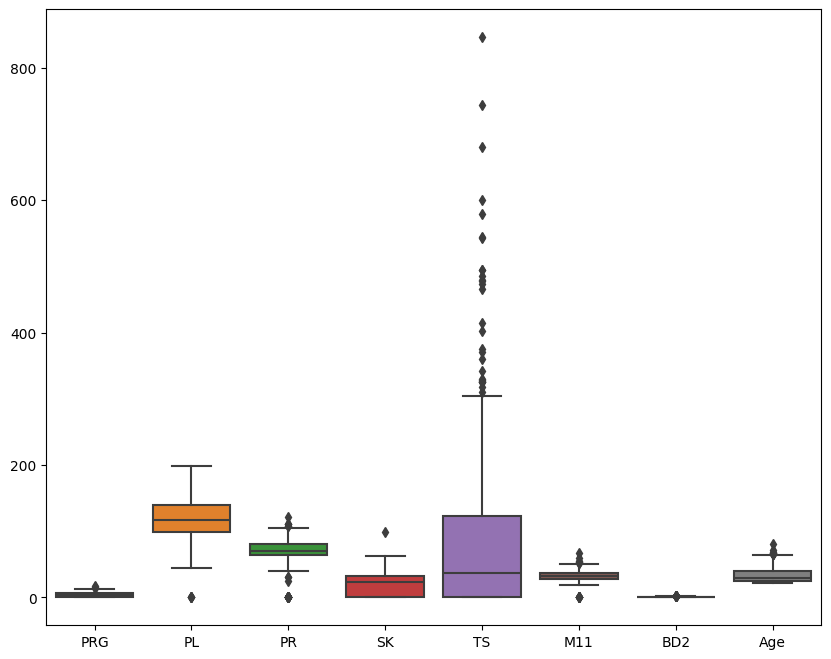

In [10]:
## check outliers 
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(train_df[num_cols])

In [11]:
def plot_binary_outliers(dataset, col, outlier_col, reset_index):
    """Plot outliers in case of a binary outlier score. Here, the col specifies the real data
    column and outlier_col the columns with a binary value (outlier or not).

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): Column that you want to plot
        outlier_col (string): Outlier column marked with true/false
        reset_index (bool): whether to reset the index for plotting
    """

    # Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/util/VisualizeDataset.py

    dataset = dataset.dropna(axis=0, subset=[col, outlier_col])
    dataset[outlier_col] = dataset[outlier_col].astype("bool")

    if reset_index:
        dataset = dataset.reset_index()

    fig, ax = plt.subplots()

    plt.xlabel("samples")
    plt.ylabel("value")

    # Plot non outliers in default color
    ax.plot(
        dataset.index[~dataset[outlier_col]],
        dataset[col][~dataset[outlier_col]],
        "+",
    )
    # Plot data points that are outliers in red
    ax.plot(
        dataset.index[dataset[outlier_col]],
        dataset[col][dataset[outlier_col]],
        "r+",
    )

    plt.legend(
        ["outlier " + col, "no outlier " + col],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )
    plt.show()


In [12]:
def mark_outliers_iqr(dataset, col):
    """Function to mark values as outliers using the IQR method.

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()

    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset[col + "_outlier"] = (dataset[col] < lower_bound) | (
        dataset[col] > upper_bound
    )

    return dataset


In [16]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 100

In [17]:
col = "PRG"
data = mark_outliers_iqr(dataset=train_df, col=col)
data.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis  \
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive   
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative   
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive   
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative   
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive   

   PRG_outlier  
0        False  
1        False  
2        False  
3        False  
4        False

Using the Interquartile range, there's quite a number of outliers present.  Let's visualize the data to see where the outliers occur

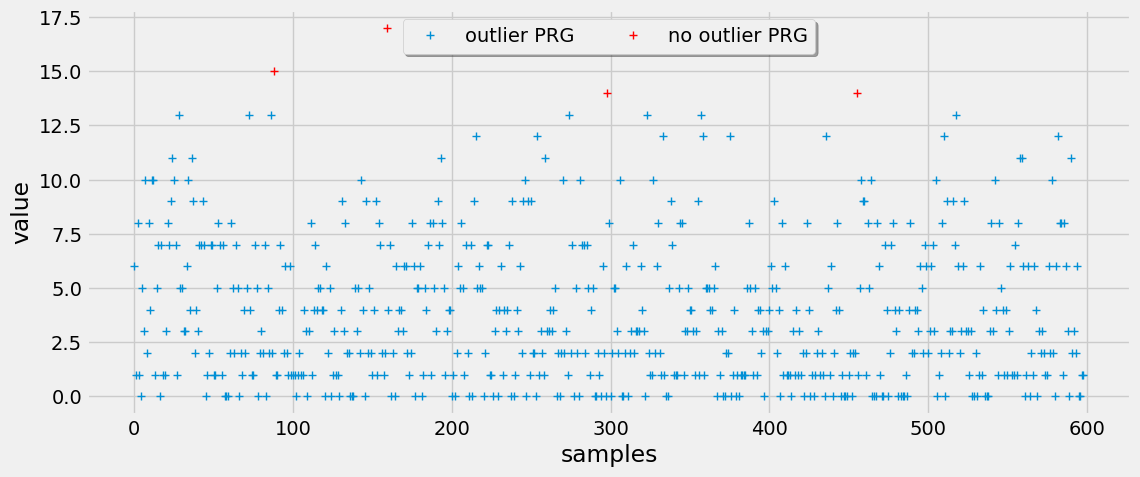

In [18]:
plot_binary_outliers(dataset=data, col=col, outlier_col=col + "_outlier", reset_index=True)

We repeat this for the rest of the columns
 

5 outliers in column PL


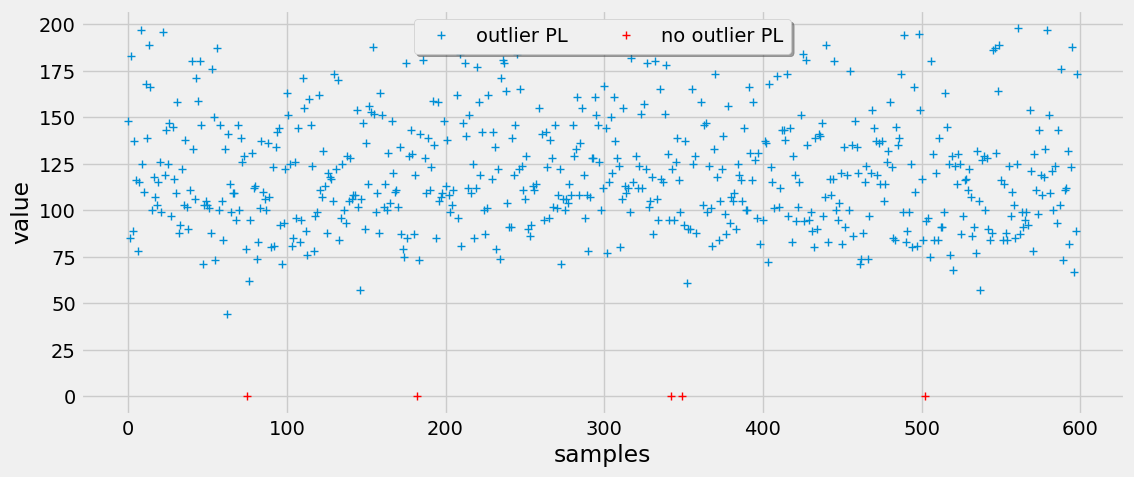

37 outliers in column PR


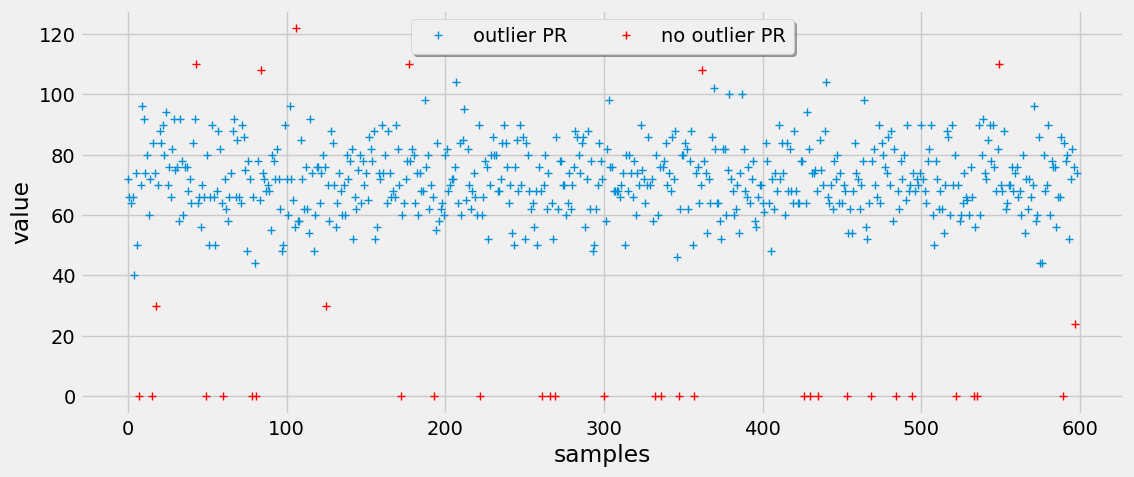

1 outliers in column SK


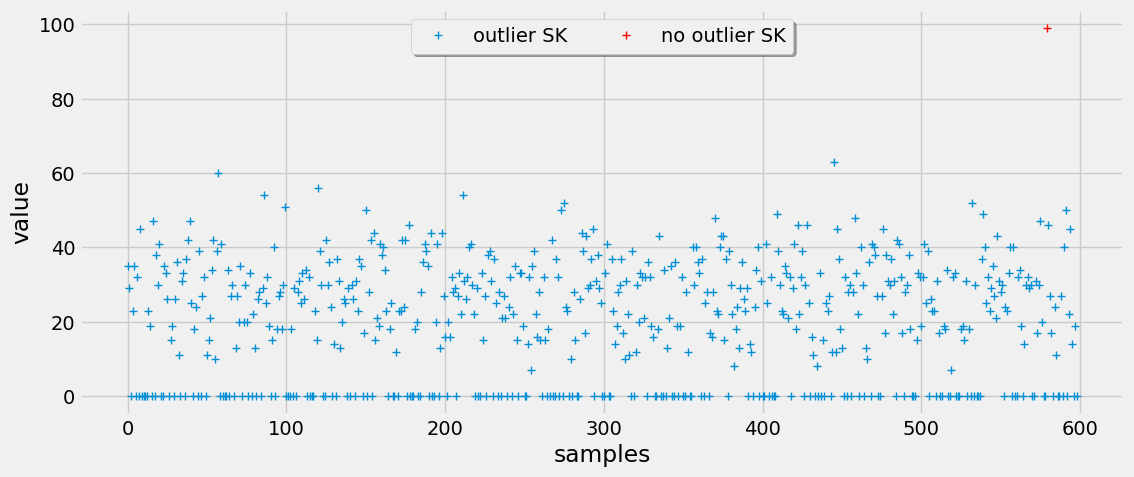

28 outliers in column TS


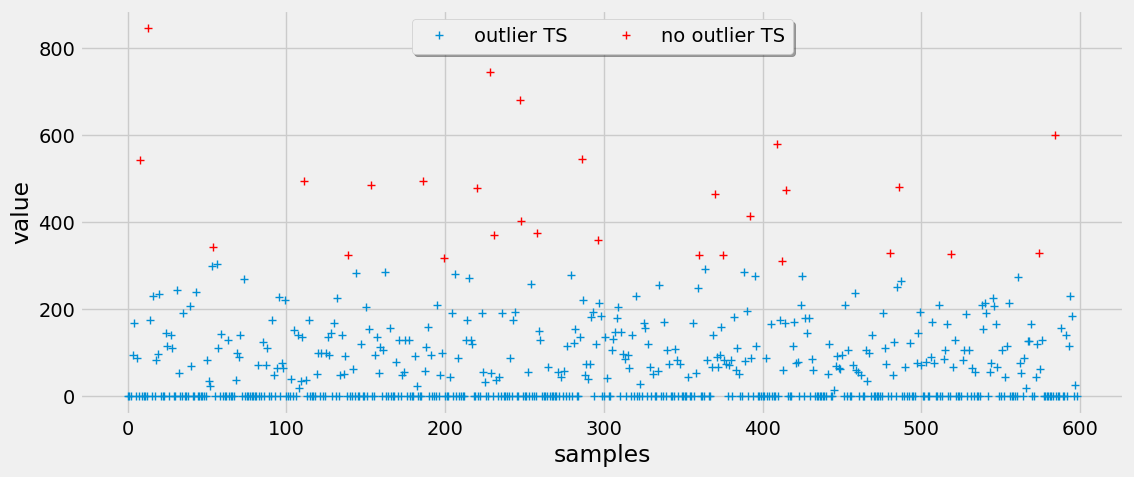

16 outliers in column M11


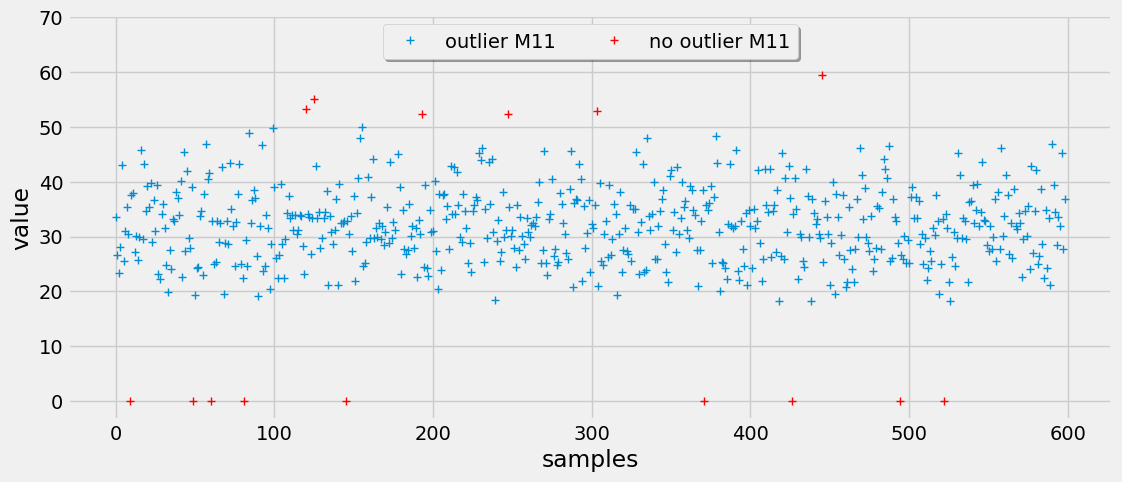

19 outliers in column BD2


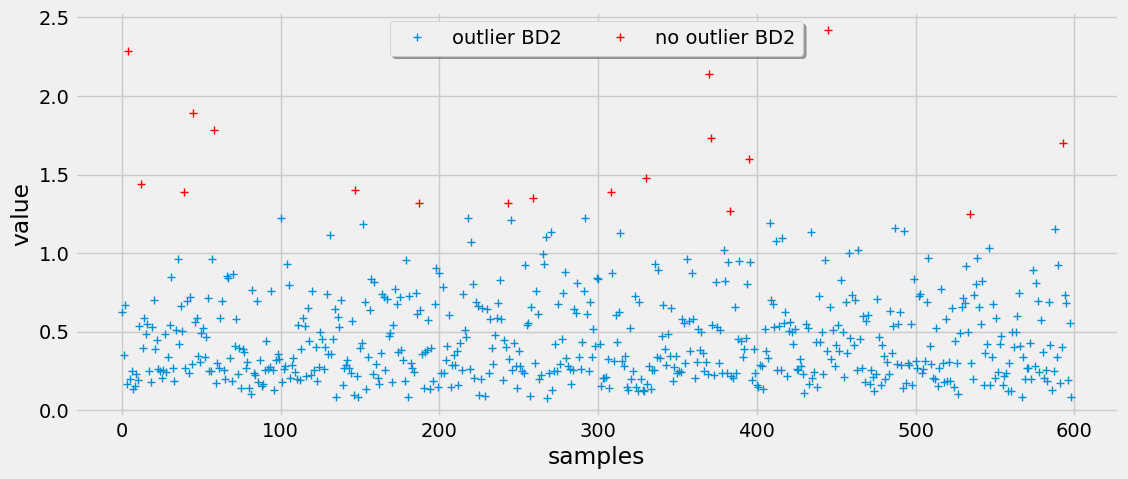

12 outliers in column Age


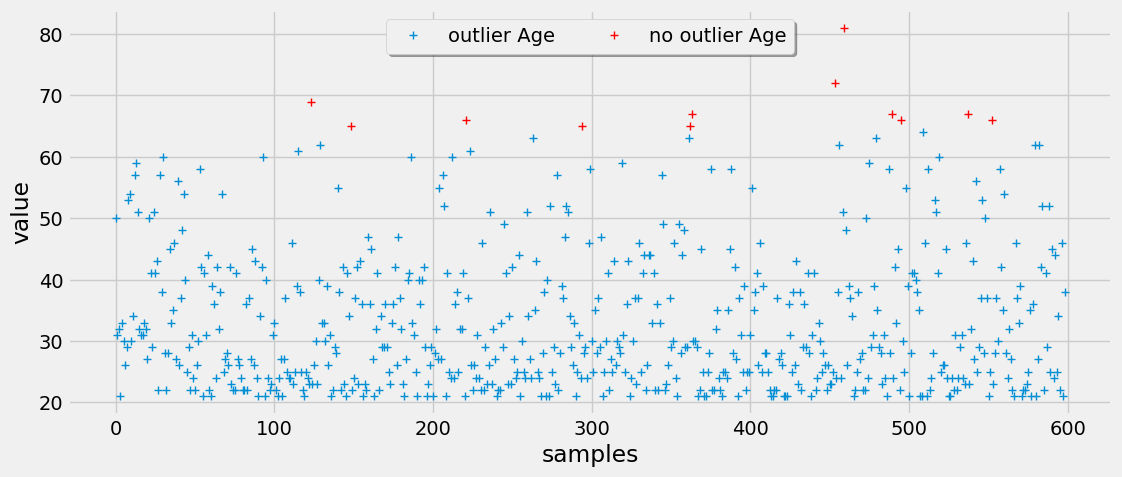

In [19]:
## plot outliers for each num variable using IQR method

for col in num_cols[1:]:
    data = mark_outliers_iqr(dataset=train_df, col=col)
    print(f"{data[col + '_outlier'].sum()} outliers in column {col}")
    plot_binary_outliers(dataset=data, col=col, outlier_col=col + "_outlier", reset_index=True)
    
    

- In some cases eg, PR, there seems to be clusters formed. 
- Let's investigate possible interaction effect with sepsis
- perhaps separating the data using the sepsis can help us to better deal with the outliers. 

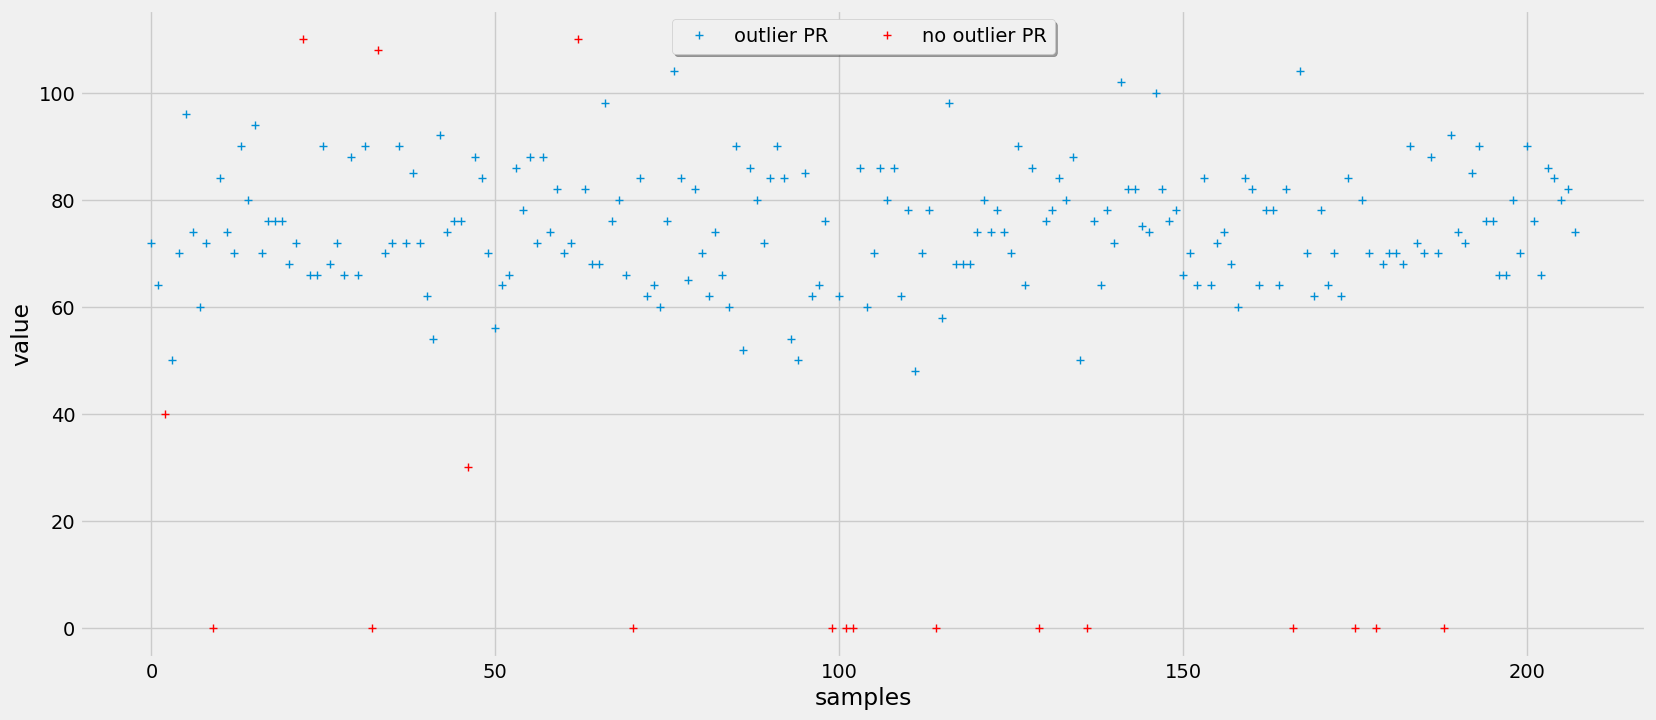

In [65]:
## plot the 2 classes of sepsis 

col = "PR" 
cls = "Positive"
data = mark_outliers_iqr(train_df[train_df["Sepssis"] == cls], col=col)
plot_binary_outliers(data, col=col, outlier_col=col + "_outlier", reset_index=True)

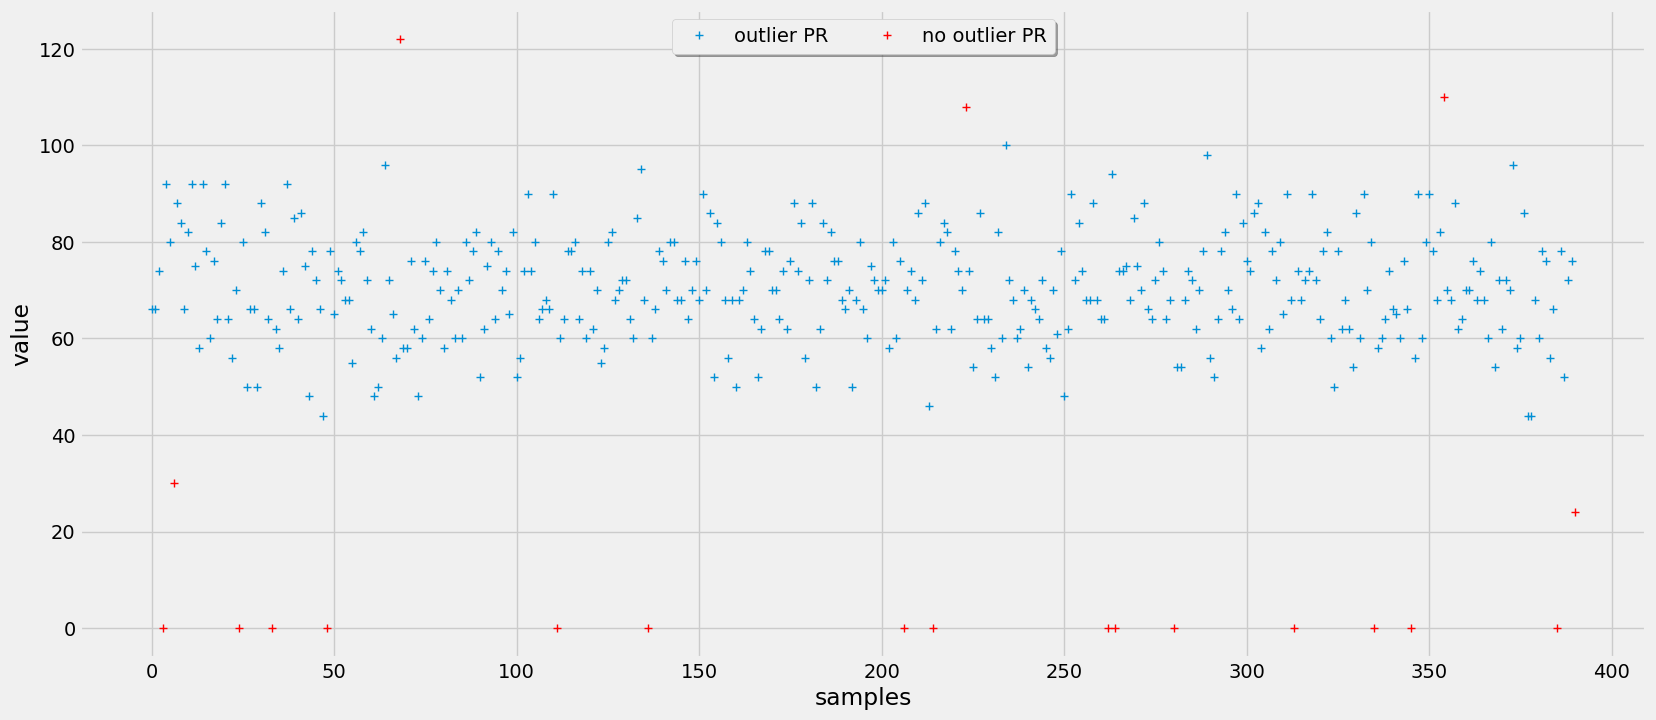

In [66]:
col = "PR" 
cls = "Negative"
data = mark_outliers_iqr(train_df[train_df["Sepssis"] == cls], col=col)
plot_binary_outliers(data, col=col, outlier_col=col + "_outlier", reset_index=True)

- the two classes of sepsis doesn't affect outlier locations. outliers are occur about equally for the two classes. 
- If the clusters were attributable to the the classes of Sepsis, then the outliers would represent important data points that reflect actual variation in the data and not anomalies or measurement errors

## Data Cleaning 
There was no missing values in our data. So we handler outliers. 

- number of outliers are relatively small, and thus imputing outliers won't significantly affect feature distribution and we get to maintain our data size . 
- we impute using winsorization - a technique that involves setting outliers to be equal to some specified upper and lower bounds. 

In [20]:
## define winsorization function

def winsorize_data(data: pd.DataFrame, cols: list) -> pd.DataFrame:
    
    winsorized_data = data.copy()
    
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        

        winsorized_data[col] = np.clip(data[col], lower_bound, upper_bound) 
    
    return winsorized_data

In [21]:
## winsorize data 

outliers_removed_df = winsorize_data(data=train_df, cols=num_cols)

0 outliers in column PRG


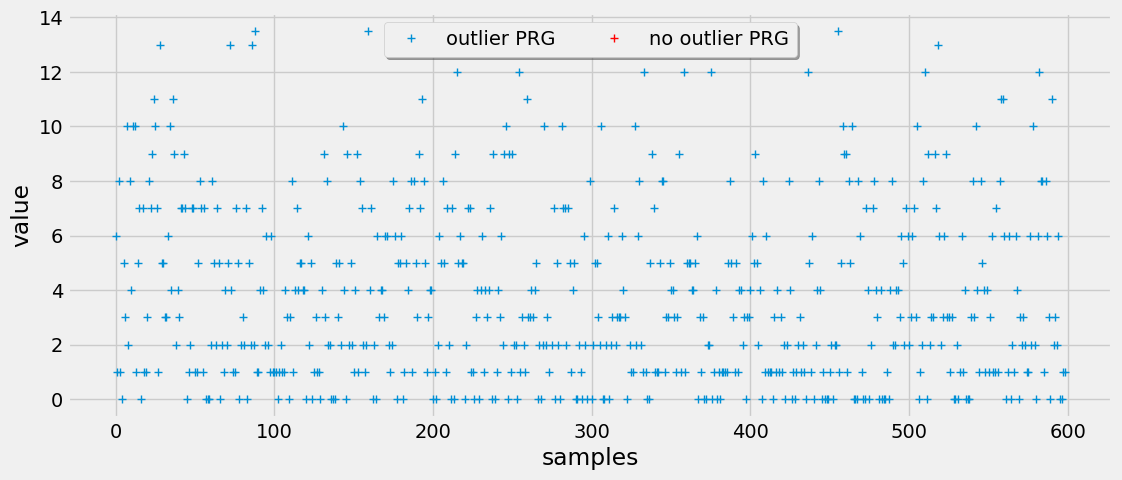

0 outliers in column PL


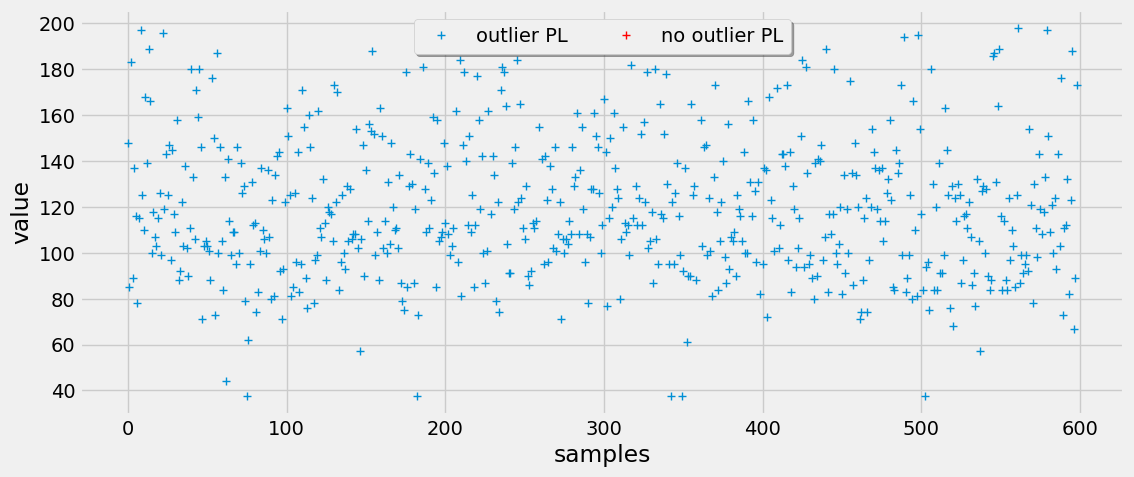

0 outliers in column PR


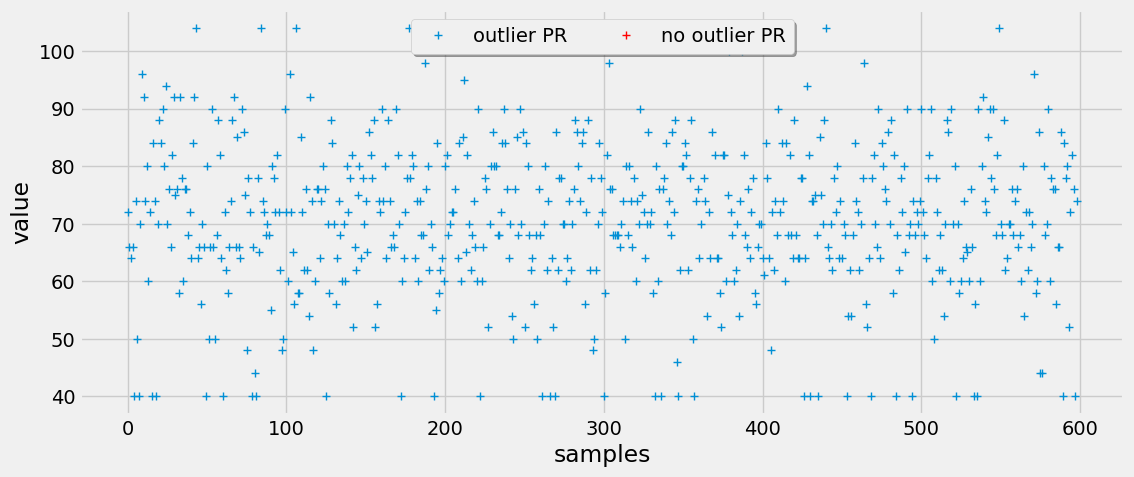

0 outliers in column SK


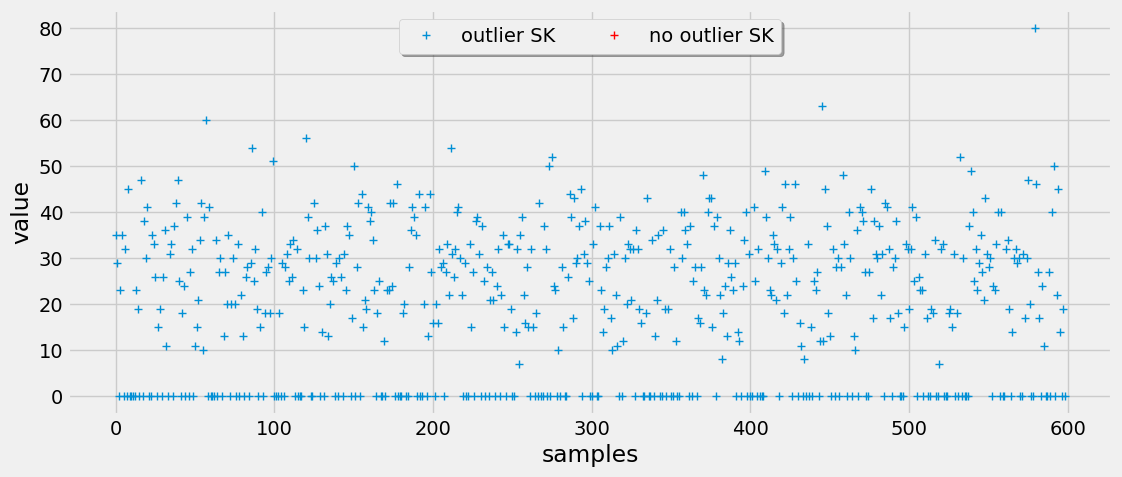

0 outliers in column TS


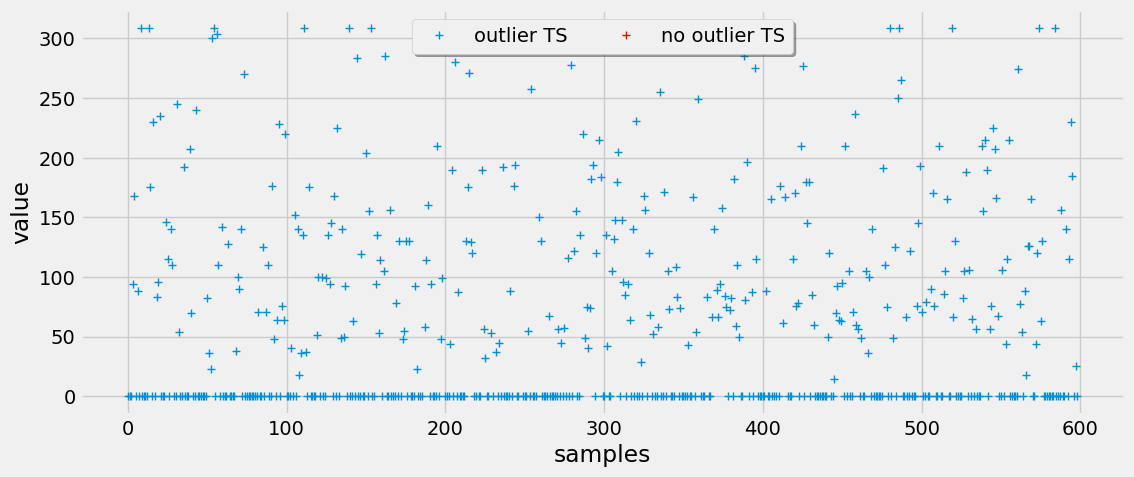

0 outliers in column M11


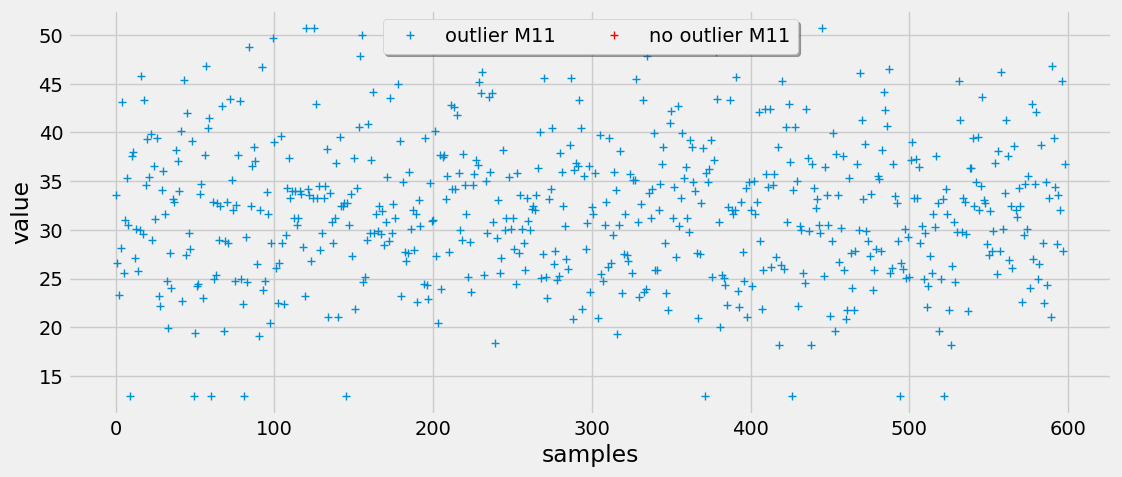

0 outliers in column BD2


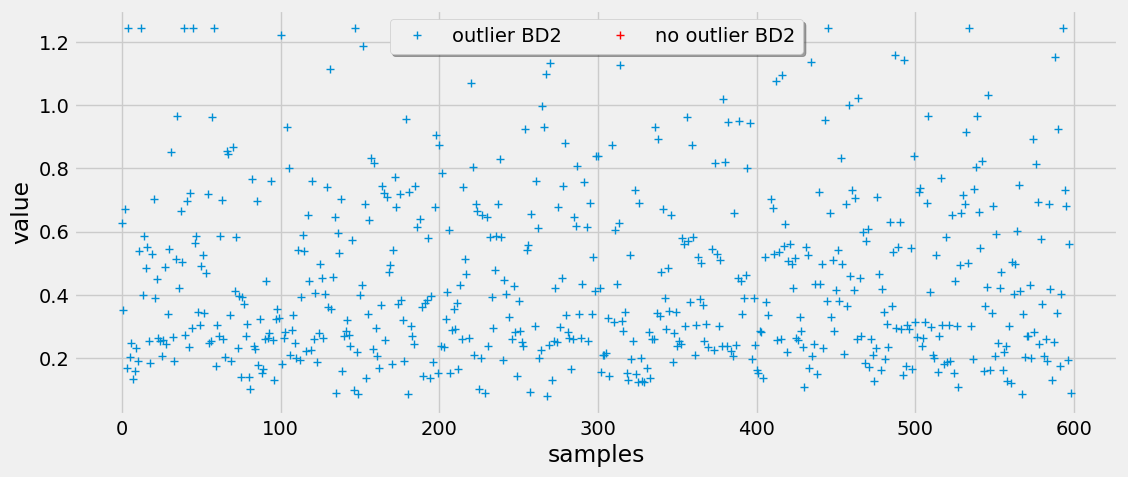

0 outliers in column Age


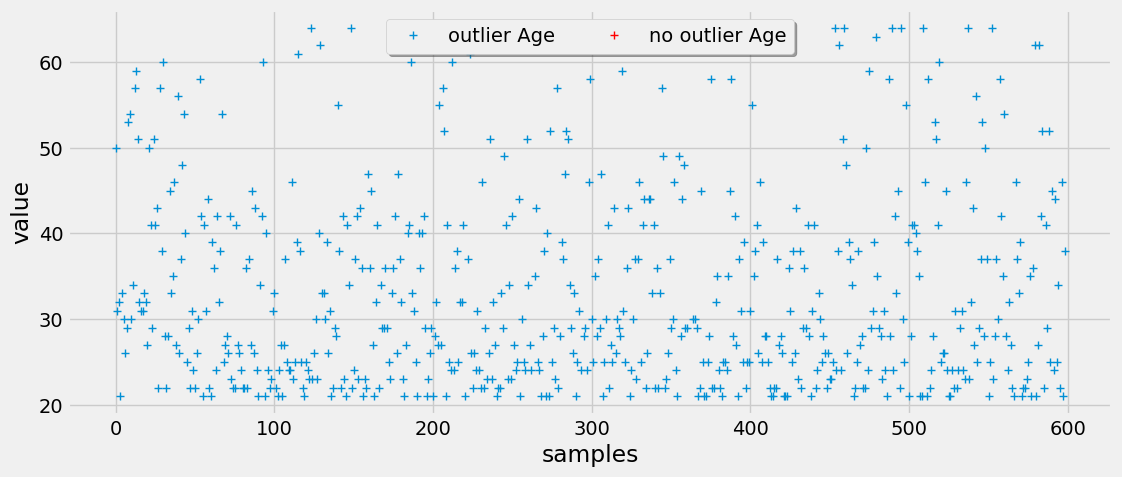

In [22]:
## plot outliers for each num variable using IQR method after imputing

for col in num_cols:
    data = mark_outliers_iqr(dataset=outliers_removed_df, col=col)
    print(f"{data[col + '_outlier'].sum()} outliers in column {col}")
    plot_binary_outliers(dataset=data, col=col, outlier_col=col + "_outlier", reset_index=True)
    

Text(0.5, 1.0, 'Multivariate Boxplot')

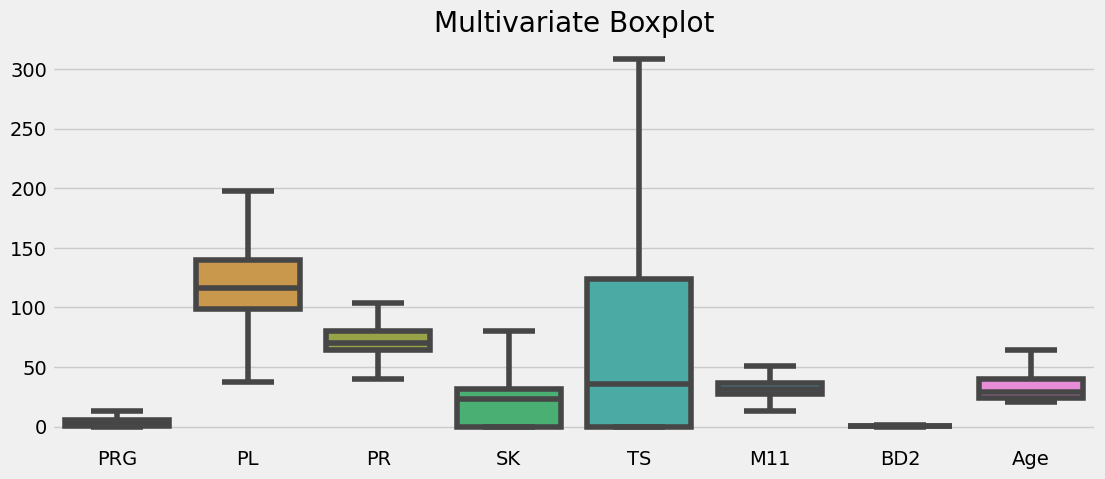

In [28]:
## check outliers 

sns.boxplot(outliers_removed_df[num_cols])
plt.title("Multivariate Boxplot");

In [24]:

outliers_removed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    float64
 2   PL         599 non-null    float64
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    float64
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 51.6+ KB


In [25]:
## save cleaned data
outliers_removed_df.to_pickle("../data/interim/outliers_removed_df.pkl")


In [104]:
data = pd.read_pickle("../data/interim/outliers_removed_df.pkl").drop("ID", axis=1)
data.head()

PRG     PL  PR  SK     TS   M11     BD2  Age  Insurance   Sepssis
0  6.0  148.0  72  35    0.0  33.6  0.6270   50          0  Positive
1  1.0   85.0  66  29    0.0  26.6  0.3510   31          0  Negative
2  8.0  183.0  64   0    0.0  23.3  0.6720   32          1  Positive
3  1.0   89.0  66  23   94.0  28.1  0.1670   21          1  Negative
4  0.0  137.0  40  35  168.0  43.1  1.2455   33          1  Positive

## Multivariate Analysis - Relationship and Pattern Exploration

### Correlation Analysis

***Correlation Heatmap***

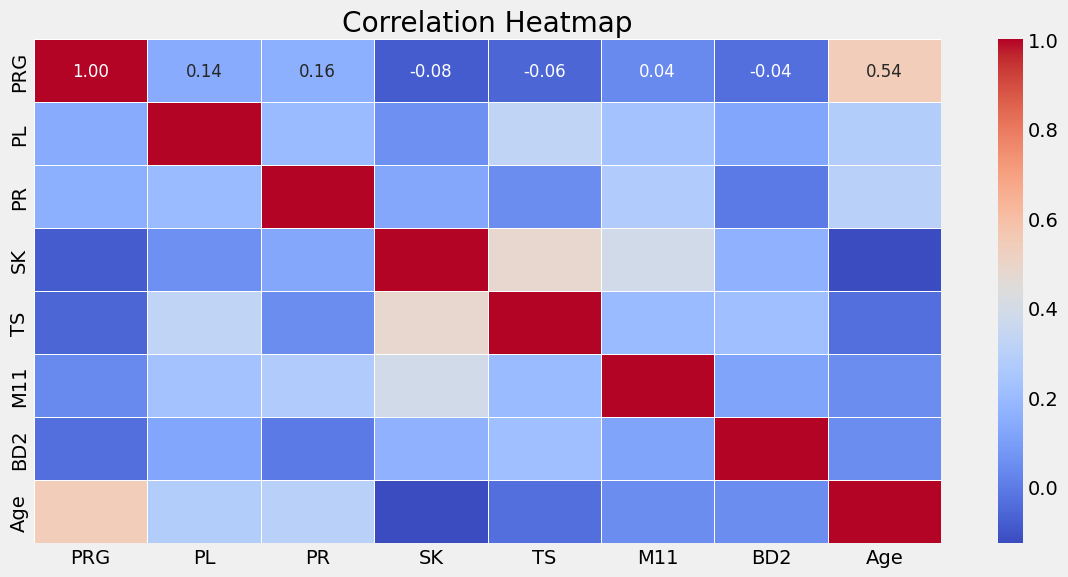

In [130]:
## Correlation heatmap
plt.rc("figure", autolayout=True)

plt.figure(figsize=(12, 6))
corr_matrix = data[num_cols].corr()
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",  linewidths=0.5, annot_kws={"size": 12})
plt.title("Correlation Heatmap");


correlation is not be to capture nonlinear relationships between features. 

***Mutual information (MI)***

- A general-purpose metric the describes relationships in terms of uncertainty. The MI between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. 

- MI between two random variables is a non-negative value, which measures the dependency between the variables. 
- It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

- MI can't detect interaction effect. feature may be informative interacting with others but not so informative alone



In [73]:
## create boolean mask for discrete features

discrete_features_mask = data.dtypes.apply(lambda x: np.issubdtype(x, np.integer))
discrete_features_mask

PRG          False
PL           False
PR            True
SK            True
TS           False
M11          False
BD2          False
Age           True
Insurance     True
Sepssis       True
dtype: bool

In [105]:
## split data into feature matrix and target

X = data.copy()
y = X.pop("Sepssis") 

In [109]:
## preview split data

display(X.head())
y.head()

PRG     PL  PR  SK     TS   M11     BD2  Age  Insurance
0  6.0  148.0  72  35    0.0  33.6  0.6270   50          0
1  1.0   85.0  66  29    0.0  26.6  0.3510   31          0
2  8.0  183.0  64   0    0.0  23.3  0.6720   32          1
3  1.0   89.0  66  23   94.0  28.1  0.1670   21          1
4  0.0  137.0  40  35  168.0  43.1  1.2455   33          1

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepssis, dtype: object

In [112]:
## calculate mutual info scores

mi_scores = pd.Series(mutual_info_classif(X, y), 
                      name="MI Scores", 
                      index=X.columns).sort_values(ascending=False)
mi_scores

PL           0.117106
M11          0.100762
Age          0.080722
TS           0.056924
PR           0.017488
BD2          0.005377
SK           0.003450
Insurance    0.002452
PRG          0.000000
Name: MI Scores, dtype: float64

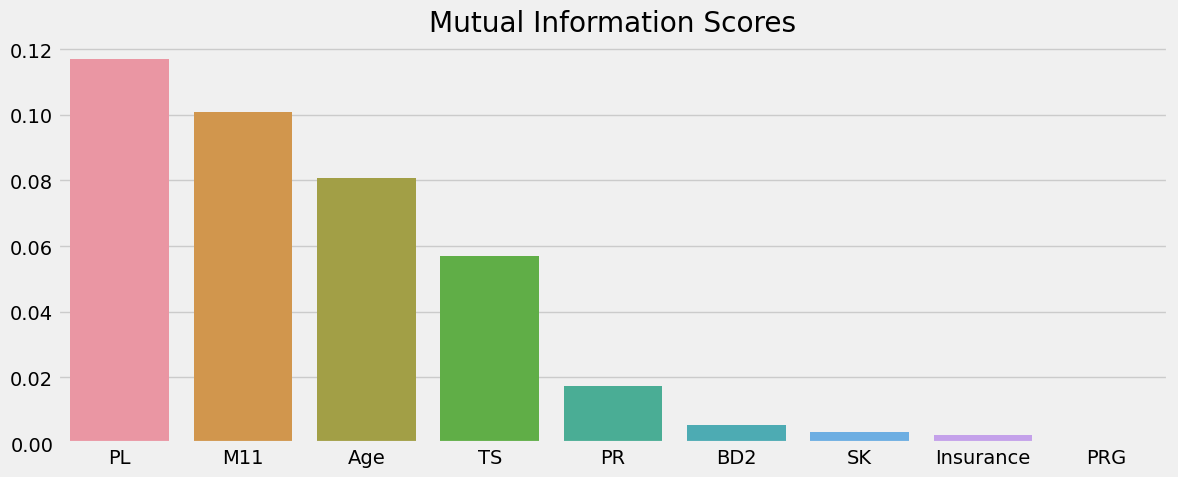

In [131]:
## visualize mi scores


sns.barplot(x=mi_scores.index,  y=mi_scores.values)
plt.title("Mutual Information Scores");

`PL -- Blodd Work Results-1` exhibits the strongest relationship with `Sepsis`.  
- Let's compare the distribution of `PL` across the two classes of `Sepsis`

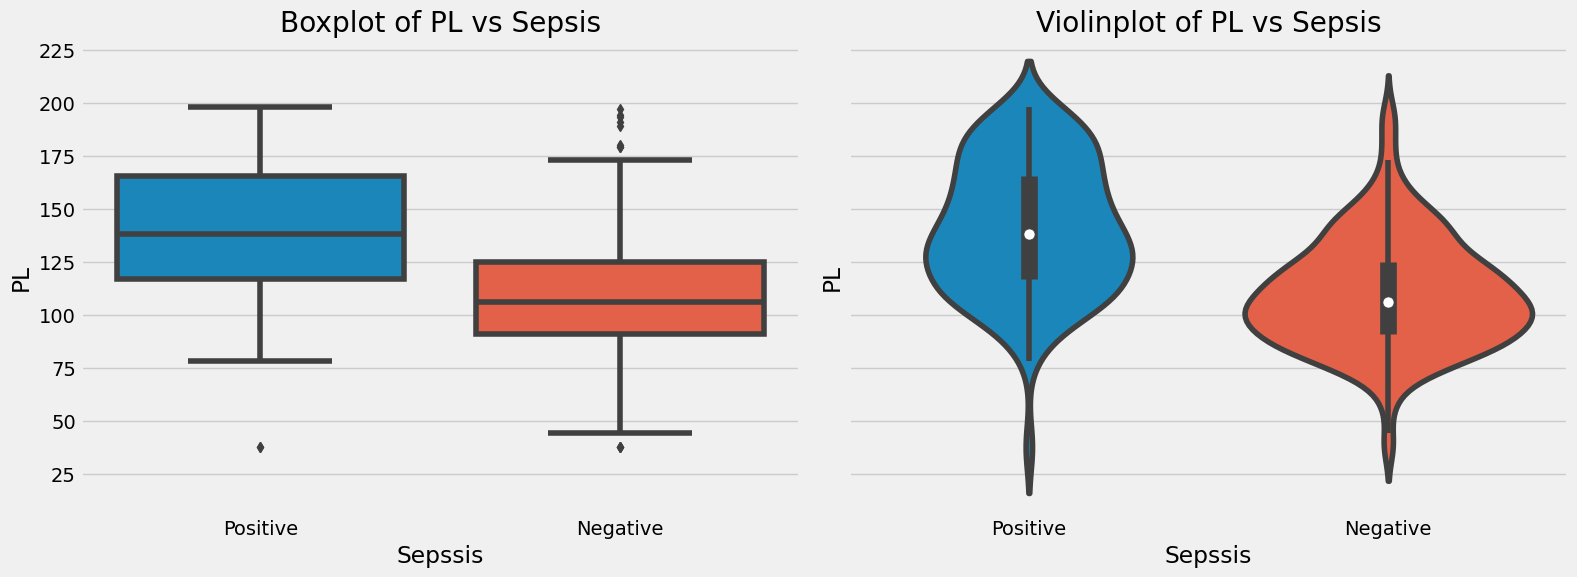

In [142]:
## violinplot and boxplot 
def box_violin_plot(col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True  )
    sns.boxplot(x="Sepssis", y=col, data=data, ax=axes[0])
    axes[0].set_title(f"Boxplot of {col} vs Sepsis")
    sns.violinplot(x="Sepssis", y=col, data=data, ax=axes[1])
    axes[1].set_title(f"Violinplot of {col} vs Sepsis");
    

box_violin_plot(col="PL")


- From the boxplox, the two class seems to have significantly different quartiles, and dispersion. 
- The outliers observed in the boxplot is likely legitimate reflecting actual variation in the data. 
- The violinplot shows that the two classes seem to have different distribution shape
- If these differences are statistically significant, then ML model will find these useful in predicting classes. 



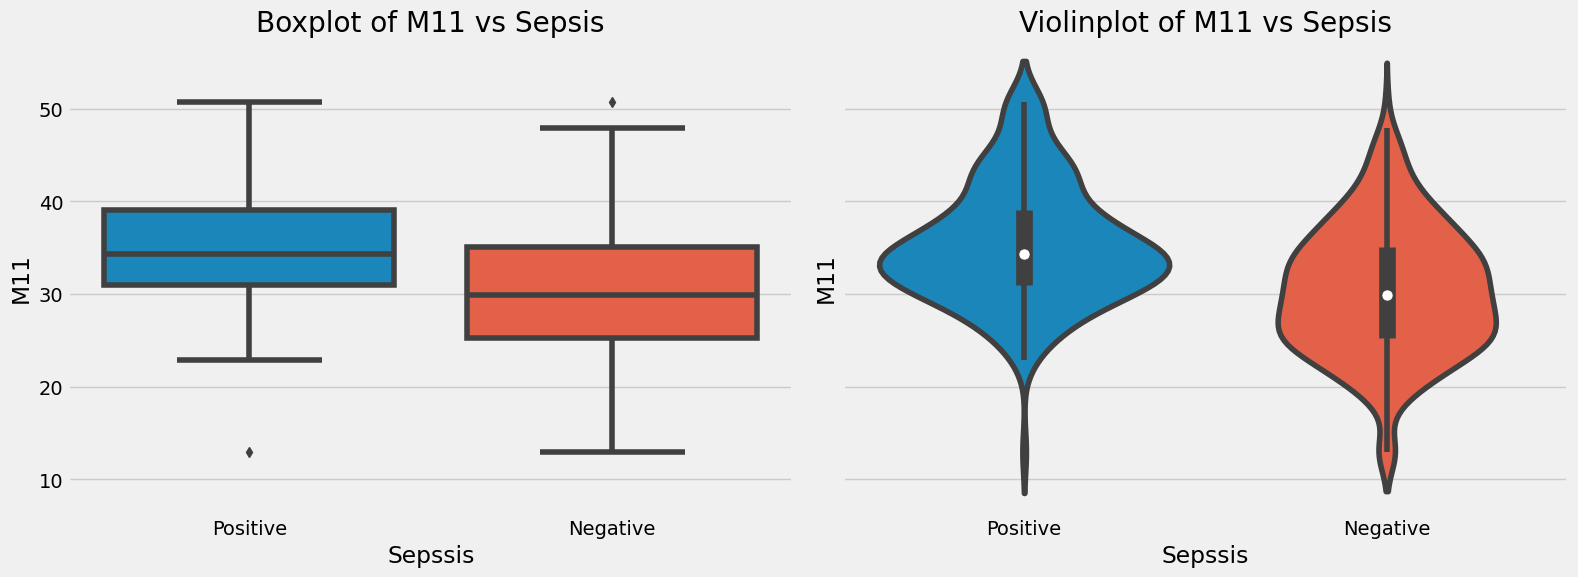

In [143]:
box_violin_plot(col="M11")

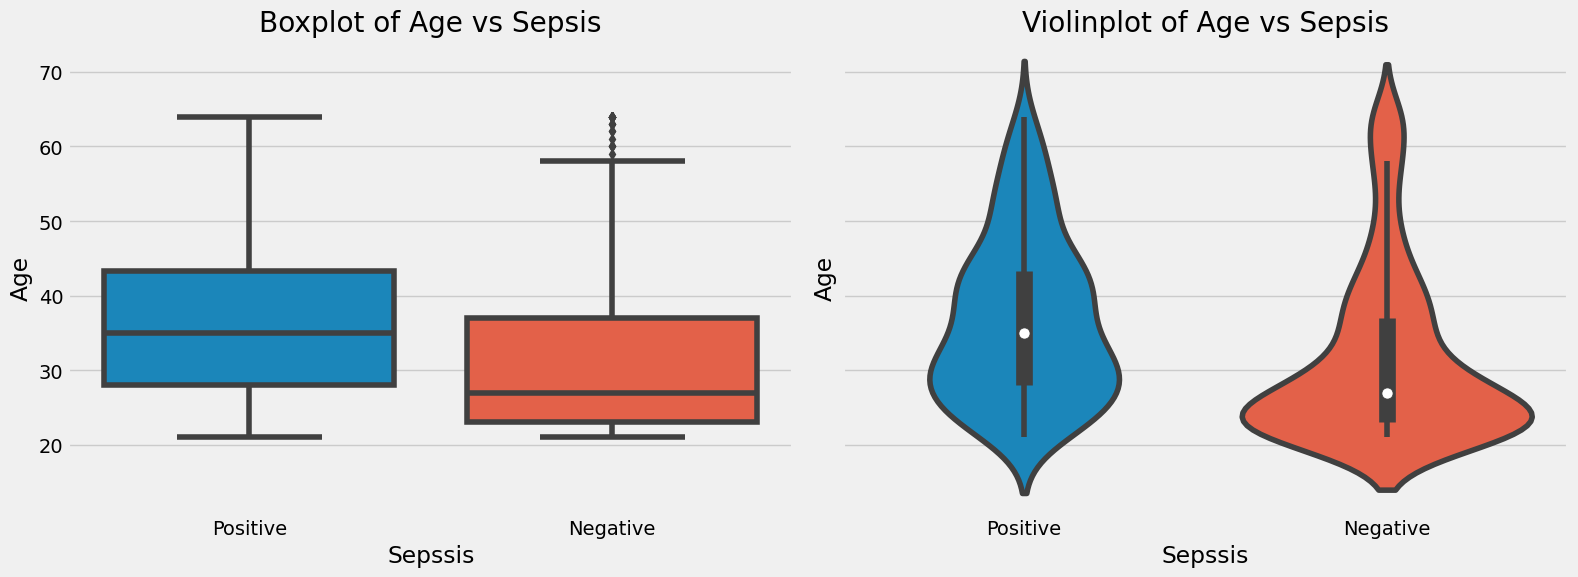

In [144]:
box_violin_plot(col="Age")

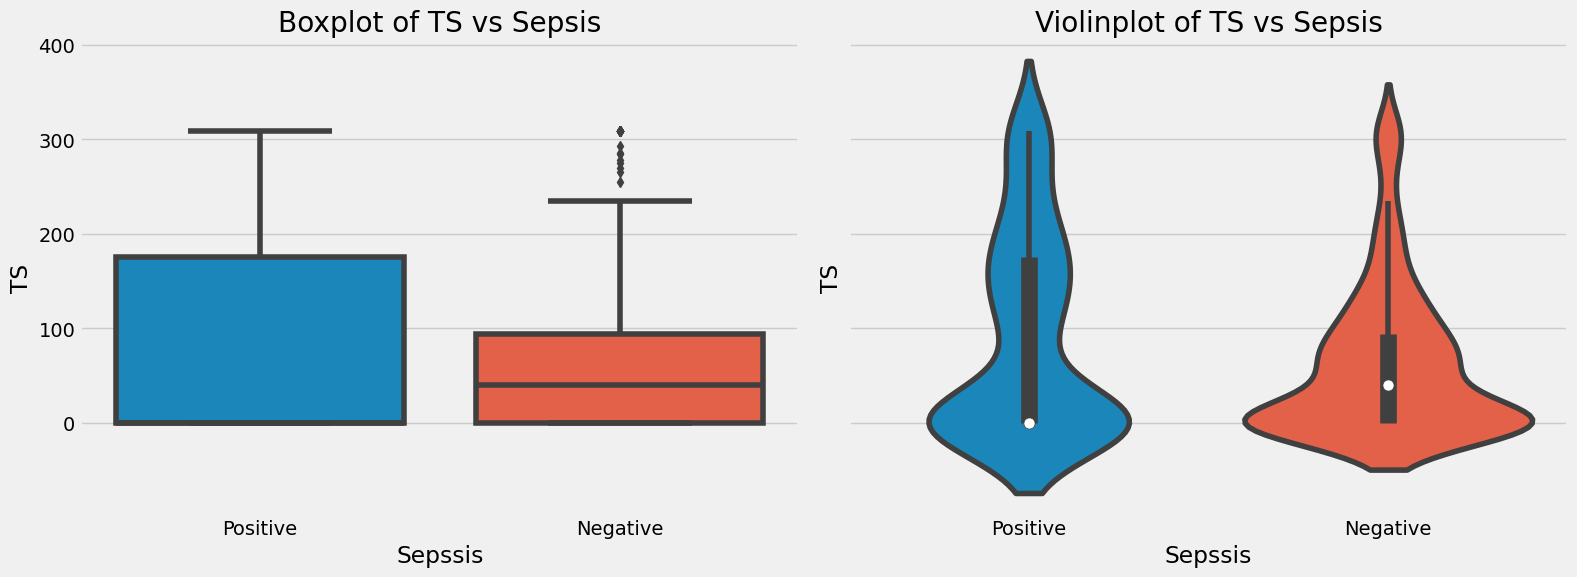

In [145]:
box_violin_plot(col="TS")

***Interactions Effects***

## Make and test Hypothesis